In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'grey'
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['font.size'] = 20

In [2]:
df_beta = pd.read_csv('manual_classification/regressions_shipped_to_users_beta_clean.csv')
df_release = pd.read_csv('manual_classification/regressions_shipped_to_users_release_clean.csv')

In [3]:
df_beta.count()

uplift_id        73
regression_id    73
reproducible     73
how_found        73
dtype: int64

In [4]:
df_release.count()

uplift_id        12
regression_id    12
reproducible     12
how_found        12
dtype: int64

In [5]:
# EASILY PREVENTABLE
easily_preventable_beta = df_beta[
    (df_beta[u'how_found'] == 'found on a widely used feature/website/config') &
    ((df_beta[u'reproducible'] == 'reproducible') | (df_beta[u'reproducible'] == 'reproducible (but not by everyone)'))
][u'how_found'].count()\
+\
df_beta[
    (df_beta[u'how_found'] == 'found via telemetry') &
    ((df_beta[u'reproducible'] == 'reproducible') | (df_beta[u'reproducible'] == 'reproducible (but not by everyone)'))
][u'how_found'].count()

easily_preventable_beta

20

In [6]:
# NOT EASILY PREVENTABLE
not_easily_preventable_beta = df_beta[
    (df_beta[u'how_found'] == 'found on a rarely used feature/website/config') &
    ((df_beta[u'reproducible'] == 'reproducible') | (df_beta[u'reproducible'] == 'reproducible (but not by everyone)'))
][u'how_found'].count()\
+\
df_beta[
    (df_beta[u'how_found'] == 'found via telemetry') &
    ((df_beta[u'reproducible'] == 'not reproducible') | (df_beta[u'reproducible'] == 'not reproducible (except by reporter)'))
][u'how_found'].count()

not_easily_preventable_beta

13

In [7]:
# NOT PREVENTABLE
df_beta[
    (df_beta[u'reproducible'] != 'unknown')
][u'how_found'].count()\
-\
easily_preventable_beta\
-\
not_easily_preventable_beta

34

In [8]:
# EASILY PREVENTABLE
easily_preventable_release = df_release[
    (df_release[u'how_found'] == 'found on a widely used feature/website/config') &
    ((df_release[u'reproducible'] == 'reproducible') | (df_release[u'reproducible'] == 'reproducible (but not by everyone)'))
][u'how_found'].count()\
+\
df_release[
    (df_release[u'how_found'] == 'found via telemetry') &
    ((df_release[u'reproducible'] == 'reproducible') | (df_release[u'reproducible'] == 'reproducible (but not by everyone)'))
][u'how_found'].count()

easily_preventable_release

3

In [9]:
# NOT EASILY PREVENTABLE
not_easily_preventable_release = df_release[
    (df_release[u'how_found'] == 'found on a rarely used feature/website/config') &
    ((df_release[u'reproducible'] == 'reproducible') | (df_release[u'reproducible'] == 'reproducible (but not by everyone)'))
][u'how_found'].count()\
+\
df_release[
    (df_release[u'how_found'] == 'found via telemetry') &
    ((df_release[u'reproducible'] == 'not reproducible') | (df_release[u'reproducible'] == 'not reproducible (except by reporter)'))
][u'how_found'].count()

not_easily_preventable_release

3

In [10]:
# NOT PREVENTABLE
df_release[
    (df_release[u'reproducible'] != 'unknown')
][u'how_found'].count()\
-\
easily_preventable_release\
-\
not_easily_preventable_release

6

In [11]:
df_beta[u'how_found'].value_counts()

found by developers                              20
found on a widely used feature/website/config    17
found by tooling                                 14
found via telemetry                              13
found on a rarely used feature/website/config     9
Name: how_found, dtype: int64

In [12]:
df_release[u'how_found'].value_counts()

found by developers                              4
found on a widely used feature/website/config    3
found on a rarely used feature/website/config    2
found via telemetry                              2
found by tooling                                 1
Name: how_found, dtype: int64

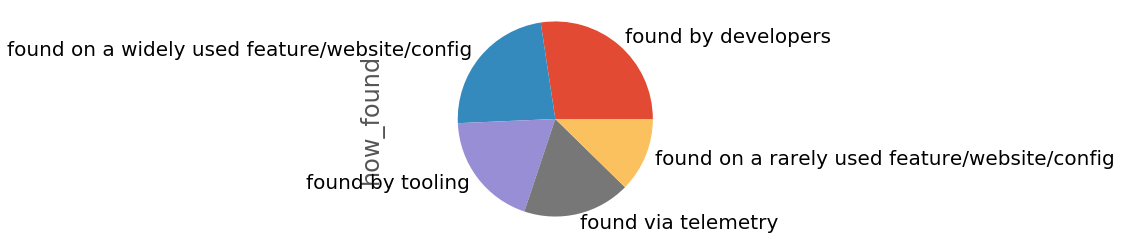

In [13]:
df_beta[u'how_found'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.show()

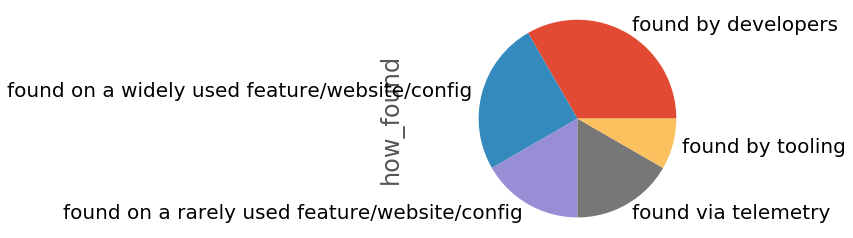

In [14]:
df_release[u'how_found'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.show()

In [15]:
df_beta[u'reproducible'].value_counts()

reproducible                             54
not reproducible                          6
unknown                                   6
reproducible (but not by everyone)        4
not reproducible (except by reporter)     3
Name: reproducible, dtype: int64

In [16]:
df_release[u'reproducible'].value_counts()

reproducible                             9
reproducible (but not by everyone)       1
not reproducible (except by reporter)    1
not reproducible                         1
Name: reproducible, dtype: int64

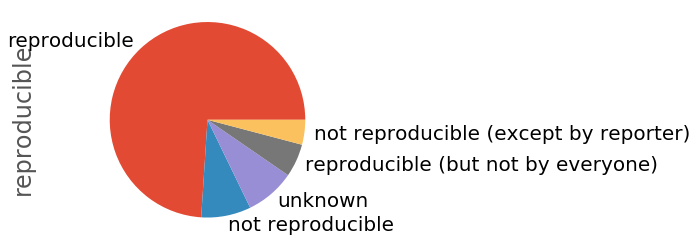

In [17]:
df_beta[u'reproducible'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.show()

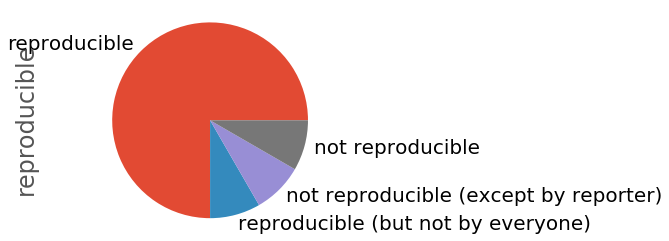

In [18]:
df_release[u'reproducible'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.show()